In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
train_data = pd.read_csv('C:/Users/patel/Downloads/titanic/train.csv')
test_data = pd.read_csv('C:/Users/patel/Downloads/titanic/test.csv')

In [4]:
print(train_data.isnull().mean())

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [5]:
print(test_data.isnull().mean())

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


In [6]:
passenger_id_4_submission = test_data['PassengerId']
train_data = train_data.drop(['PassengerId'],axis=1)
test_data = test_data.drop(['PassengerId'],axis=1)

In [7]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we drop cabin,name,ticket column

In [8]:
train_data = train_data.drop(['Cabin','Name','Ticket'],axis=1)
test_data = test_data.drop(['Cabin','Name','Ticket'],axis=1)

In [9]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

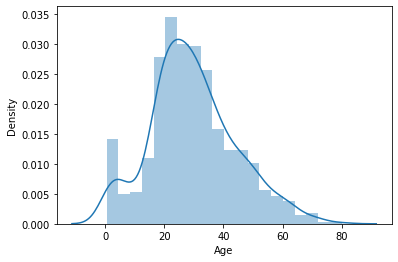

In [10]:
sns.distplot(train_data.Age)

In [11]:
train_data.Age = train_data.Age.fillna(train_data.Age.mean())

In [12]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [13]:
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode()[0])

In [14]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [15]:
categorical_feature = train_data.select_dtypes('object').columns

In [16]:
train_data = pd.get_dummies(train_data,drop_first=True)
test_data = pd.get_dummies(test_data,drop_first=True)

In [17]:
x = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

In [18]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import tree,ensemble

In [19]:
model1 = linear_model.LogisticRegression()

In [20]:
model1.fit(x,y)

LogisticRegression()

In [21]:
model2 = tree.DecisionTreeClassifier(random_state=42)

In [22]:
model2.fit(x,y)

DecisionTreeClassifier(random_state=42)

In [23]:
model3 = ensemble.RandomForestClassifier()

In [24]:
model3.fit(x,y)

RandomForestClassifier()

In [25]:
model_pred = pd.DataFrame(model1.predict(test_data),columns=['model1_pred'])
model_pred['model2_pred'] = pd.DataFrame(model2.predict(test_data))
model_pred['model3_pred'] = pd.DataFrame(model3.predict(test_data))

In [26]:
model_pred['final'] = round((model_pred['model1_pred'] + model_pred['model2_pred'] + model_pred['model3_pred'])/3)

In [27]:
model_pred['final'] =  np.where(model_pred['final'] == 1.0,1,0)

In [28]:
submission = pd.concat([passenger_id_4_submission,model_pred['final']],axis=1)

In [29]:
submission

,PassengerId,final
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [30]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe


# create a link to download the dataframe
create_download_link(submission)

In [31]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state=42,test_size=0.1)

In [196]:
xgb_params= {
        "objective": "binary:logistic",
          "eta": 0.15,
          "max_depth": 7,
          "min_child_weight": 10,
          "silent": 1,
          "subsample": 0.7,
          "colsample_bytree": 1,
          "seed": 1
    }

In [197]:
import xgboost as xgb

In [204]:
train = xgb.DMatrix(x,label=y)
test = xgb.DMatrix(test_data)

In [210]:
model = xgb.train(xgb_params,train,300)

[19:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [212]:
y_pred = model.predict(test)
y_pred = np.where(y_pred>0.5,1,0)
y_pred = pd.DataFrame(y_pred)
create_download_link(y_pred)

In [201]:
from sklearn.metrics import accuracy_score

In [203]:
# accuracy_score(y_test,y_pred)

0.8555555555555555

In [171]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [32]:
from xgboost import XGBRFClassifier

In [33]:
gv = model_selection.GridSearchCV(estimator=XGBRFClassifier(),param_grid=params,cv=model_selection.StratifiedKFold(n_splits=5),n_jobs=-1,verbose=10,scoring='accuracy')

In [ ]:
gv.fit(x_train,y_train)

In [ ]:
gv.best_params_

In [ ]:
model = XGBRFClassifier(colsample_bytree=0.8,
 gamma=2,
 max_depth= 4,
 min_child_weight= 1,
 subsample=0.6)

In [ ]:
model.fit(x,y)

In [ ]:
y_pred = pd.DataFrame(model.predict(test_data))

In [91]:
create_download_link(y_pred)